In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function to plot a gallery of portraits
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

Total dataset size:
Number of samples: 200
Number of features per sample: 90000
Number of classes (persons): 4
Extracting the top 150 eigenfaces from 150 faces


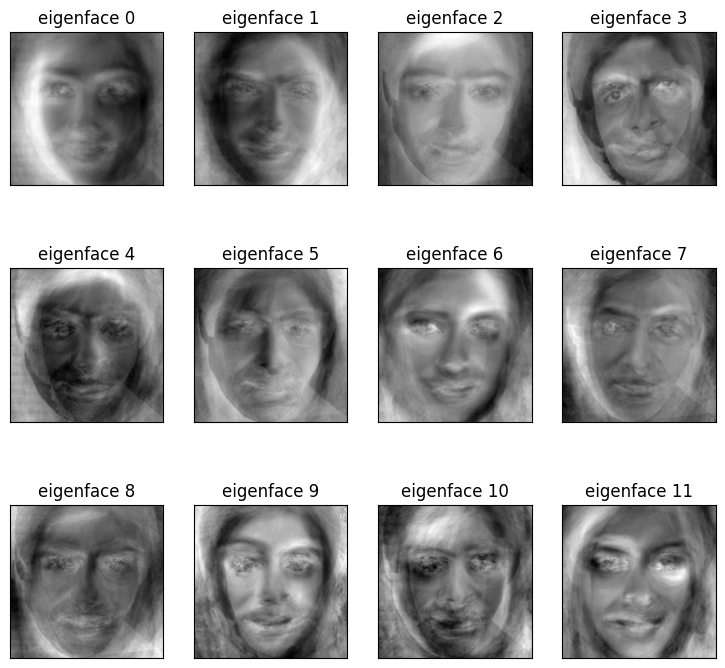

Iteration 1, loss = 1.53575768
Iteration 2, loss = 1.52161001
Iteration 3, loss = 1.50763301
Iteration 4, loss = 1.49383558
Iteration 5, loss = 1.48022714
Iteration 6, loss = 1.46672084
Iteration 7, loss = 1.45335615
Iteration 8, loss = 1.44021686
Iteration 9, loss = 1.42723666
Iteration 10, loss = 1.41454831
Iteration 11, loss = 1.40207565
Iteration 12, loss = 1.38980965
Iteration 13, loss = 1.37774250
Iteration 14, loss = 1.36587289
Iteration 15, loss = 1.35411592
Iteration 16, loss = 1.34249572
Iteration 17, loss = 1.33093089
Iteration 18, loss = 1.31944122
Iteration 19, loss = 1.30807243
Iteration 20, loss = 1.29685141
Iteration 21, loss = 1.28578666
Iteration 22, loss = 1.27484376
Iteration 23, loss = 1.26397179
Iteration 24, loss = 1.25320358
Iteration 25, loss = 1.24255276
Iteration 26, loss = 1.23204561
Iteration 27, loss = 1.22166577
Iteration 28, loss = 1.21132724
Iteration 29, loss = 1.20115312
Iteration 30, loss = 1.19106289
Iteration 31, loss = 1.18116007
Iteration 32, los

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Pyth

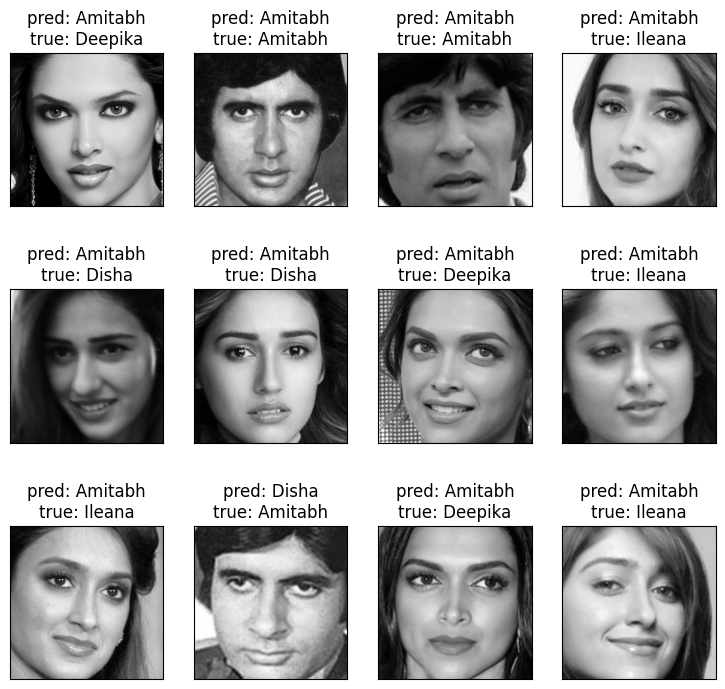

In [5]:
# Load face images from the directory
dir_name = r"c:\Users\hp\Downloads\Fac"
h = w = 300  # Assuming images are resized to 300x300 pixels
X, y = [], []
target_names = []
person_id = 0

for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    target_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        resized_img = cv2.resize(img, (h, w)).flatten()
        X.append(resized_img)
        y.append(person_id)
    person_id += 1

X = np.array(X)
y = np.array(y)
target_names = np.array(target_names)
n_samples, n_features = X.shape
n_classes = len(target_names)

print(f"Total dataset size:\nNumber of samples: {n_samples}\nNumber of features per sample: {n_features}\nNumber of classes (persons): {n_classes}")

# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Perform PCA to extract eigenfaces
n_components = 150
print(f"Extracting the top {n_components} eigenfaces from {X_train.shape[0]} faces")
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Plot the eigenfaces
eigenface_titles = [f"eigenface {i}" for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

# Project the input data on the eigenfaces orthonormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

# Train a Multi-Layer Perceptron classifier
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000, verbose=True)
clf.fit(X_train_lda, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=target_names))

# Plot the test results
prediction_titles = [f"pred: {target_names[y_pred[i]]}\ntrue: {target_names[y_test[i]]}" for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)
plt.show()


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


k=10, Accuracy: 70.00%
k=20, Accuracy: 68.00%
k=30, Accuracy: 74.00%
k=40, Accuracy: 76.00%
k=50, Accuracy: 80.00%
k=60, Accuracy: 80.00%
k=70, Accuracy: 78.00%
k=80, Accuracy: 82.00%
k=90, Accuracy: 80.00%
k=100, Accuracy: 78.00%
k=110, Accuracy: 78.00%
k=120, Accuracy: 74.00%
k=130, Accuracy: 24.00%
k=140, Accuracy: 20.00%
k=150, Accuracy: 42.00%


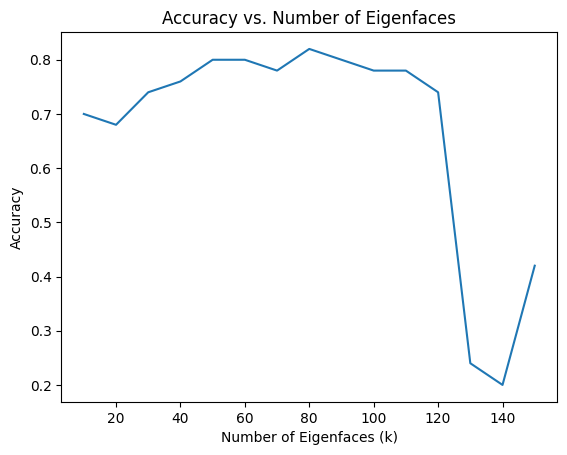

In [6]:
# Function to evaluate and plot accuracy for different k values
def evaluate_k_values(k_values, X_train, X_test, y_train, y_test):
    accuracies = []
    for k in k_values:
        pca = PCA(n_components=k, svd_solver='randomized', whiten=True).fit(X_train)
        X_train_pca = pca.transform(X_train)
        X_test_pca = pca.transform(X_test)
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_pca, y_train)
        X_train_lda = lda.transform(X_train_pca)
        X_test_lda = lda.transform(X_test_pca)
        clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10, 10), max_iter=1000)
        clf.fit(X_train_lda, y_train)
        y_pred = clf.predict(X_test_lda)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"k={k}, Accuracy: {accuracy * 100:.2f}%")
    return accuracies

k_values = range(10, 151, 10)
accuracies = evaluate_k_values(k_values, X_train, X_test, y_train, y_test)
plt.plot(k_values, accuracies)
plt.xlabel('Number of Eigenfaces (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Eigenfaces')
plt.show()
